In [1]:
# Load in packages
import numpy as np
import pandas as pd
from datetime import date
import seaborn as sns

In [2]:
# Read in data
data = pd.read_csv("dad.csv")
# Backup
df = data.copy()

In [3]:
# Rename column to remove white space
data.rename(columns={'Health region': 'healthregion'}, inplace=True)

In [4]:
data.head()

,id,prv,agecode,age_dad,gender,diagcode1,intvcode1,postalcode,cpwc,cpwc_char,riw,admsdate,dischdate,healthregion
0,1,3,Y,95,F,Z302,2NQ71BA,E1A1A1,5000,"5,000",1.188,13-Jul-12,15-Jul-12,3
1,3,3,Y,87,M,H269,1RM87CAAE,E1A1A1,5000,"5,000",NaN,04-May-13,11-May-13,1
2,9,3,Y,58,M,K029,1CL89VRLM,E1A1A1,5000,"5,000",NaN,19-Aug-12,25-Aug-12,2
3,13,3,Y,85,M,I214,5MD54KK,E1A1A1,5000,"5,000",NaN,04-May-12,08-May-12,2
4,15,3,Y,5,M,I214,1CL89VRLM,E1A1A1,5000,"5,000",NaN,03-Jan-13,08-Jan-13,1


In [5]:
# Convert to dates and find the difference between admission and discharge dates
data['admsdate'] = pd.to_datetime(data['admsdate'])
data['dischdate'] = pd.to_datetime(data['dischdate'])
data['staylength'] = (data['dischdate']-data['admsdate']).dt.days

# Calculate cost of stay
data['staycost'] = data['cpwc']*data['riw']

In [6]:
# Create a column for fiscal year
offset = pd.DateOffset(months=3)
data['fiscalyear'] = (data['admsdate'] - pd.DateOffset(months=3)).dt.year

In [7]:
# Subset data to only include COPD patients
copd_codes = ('J41','J42','J43','J44')
copd = data[data["diagcode1"].str.startswith(copd_codes)]

In [8]:
# A summary of stay length and stay cost
print(copd[['staylength','staycost']].describe())
print(copd[['staylength','staycost']].sum())

        staylength      staycost
count  3010.000000   1810.000000
mean      2.476744   5120.831492
std       1.937789   4763.695802
min       1.000000    570.000000
25%       1.000000   2415.000000
50%       2.000000   3715.000000
75%       3.000000   6523.750000
max      16.000000  60835.000000
staylength       7455.0
staycost      9268705.0
dtype: float64


In [9]:
# Stay length by fiscal year
copd.groupby(['fiscalyear'])['staylength'].describe()

,count,mean,std,min,25%,50%,75%,max
fiscalyear,,,,,,,,
2012,2734.0,2.481712,1.951534,1.0,1.0,2.0,3.0,16.0
2013,261.0,2.429119,1.799507,1.0,1.0,2.0,3.0,11.0
2014,15.0,2.400000,1.843909,1.0,1.0,1.0,4.0,6.0


In [10]:
# Stay cost by fiscal year
copd.groupby(['fiscalyear'])['staycost'].describe()

,count,mean,std,min,25%,50%,75%,max
fiscalyear,,,,,,,,
2012,1635.0,5129.461774,4724.771929,570.0,2430.00,3715.0,6550.0,60835.0
2013,165.0,5042.848485,5243.532870,570.0,2340.00,3570.0,6510.0,54455.0
2014,10.0,4996.500000,2673.348971,1815.0,3298.75,4150.0,5880.0,10425.0


In [11]:
# Total cost by fiscal year
copd.groupby(['fiscalyear'])['staycost'].sum()

fiscalyear
2012    8386670.0
2013     832070.0
2014      49965.0
Name: staycost, dtype: float64

In [12]:
# Counts of available data by age
copd.groupby(['gender','agecode'])[['staylength','staycost']].count()

staylength  staycost
gender agecode                      
F      M                20        13
       Y              1146       674
M      M                40        28
       Y              1804      1095

In [13]:
# Average numbers by gender and age code
copd.groupby(['gender','agecode'])[['age_dad','staylength','staycost']].mean()

age_dad  staylength     staycost
gender agecode                                    
F      M        13.650000    2.700000  5796.538462
       Y        50.554974    2.457243  4911.335312
M      M        14.175000    2.250000  8381.428571
       Y        50.386918    2.491685  5158.383562

In [14]:
# Data broekn down by age code and health region
copd.groupby(['agecode','healthregion'])[['staylength','staycost']].describe()

staylength                                            \
                          count      mean       std  min   25%  50%   75%   
agecode healthregion                                                        
M       1                   6.0  2.000000  2.000000  1.0  1.00  1.0  1.75   
        2                  15.0  2.266667  1.791514  1.0  1.00  2.0  2.00   
        3                   5.0  3.000000  2.121320  1.0  1.00  3.0  4.00   
        4                   4.0  2.750000  1.500000  1.0  1.75  3.0  4.00   
        5                  14.0  2.000000  1.176697  1.0  1.00  2.0  2.75   
        6                   9.0  2.555556  1.943651  1.0  1.00  2.0  3.00   
        7                   7.0  3.000000  3.696846  1.0  1.00  1.0  3.00   
Y       1                 453.0  2.565121  1.921771  1.0  1.00  2.0  3.00   
        2                 407.0  2.410319  1.874430  1.0  1.00  2.0  3.00   
        3                 398.0  2.620603  2.140947  1.0  1.00  2.0  3.00   
        4                 399.0  2.393484  1.960171  1.0  1.00  2.0  3.00   
        5                 439.0  2.439636  1.777684  1.0  1.00  2.0  3.00   
        6                 450.0  2.402222  1.847286  1.0  1.00  2.0  3.00   
        7                 404.0  2.519802  2.047114  1.0  1.00  2.0  3.00   

                           staycost                                      \
                       max    count          mean           std     min   
agecode healthregion                                                      
M       1              6.0      4.0   2678.750000   2177.545924   670.0   
        2              8.0     10.0   7101.500000   4422.405737  2315.0   
        3              6.0      4.0   3852.500000   3356.085269   670.0   
        4              4.0      3.0   8688.333333  13410.388075   670.0   
        5              5.0     11.0  11859.090909  14216.882714  2380.0   
        6              7.0      7.0   4680.000000   4625.498171  1225.0   
        7             11.0      2.0  11810.000000  12218.805179  3170.0   
Y       1             13.0    302.0   5142.201987   4624.183527   605.0   
        2             11.0    238.0   4842.142857   5389.967202   670.0   
        3             16.0    230.0   4916.760870   4549.302486   670.0   
        4             15.0    251.0   5010.916335   4128.115376   570.0   
        5             12.0    245.0   4975.040816   3646.156746   570.0   
        6             13.0    290.0   4949.879310   4336.107343   670.0   
        7             14.0    213.0   5682.394366   5477.100777   670.0   

                                                           
                          25%      50%       75%      max  
agecode healthregion                                       
M       1             1082.50   2310.0   3906.25   5425.0  
        2             3758.75   5362.5  10223.75  14085.0  
        3             1562.50   3262.5   5552.50   8215.0  
        4              947.50   1225.0  12697.50  24170.0  
        5             3017.50   4740.0  15090.00  50825.0  
        6             1822.50   2490.0   6355.00  12690.0  
        7             7490.00  11810.0  16130.00  20450.0  
Y       1             2462.50   3797.5   6742.50  47755.0  
        2             2302.50   3372.5   5565.00  60835.0  
        3             2271.25   3460.0   6061.25  30490.0  
        4             2590.00   3935.0   6300.00  32445.0  
        5             2515.00   3985.0   6505.00  19875.0  
        6             2391.25   3655.0   6310.00  38765.0  
        7             3000.00   4180.0   7365.00  54455.0

Text(0.5, 1.0, 'Average Cost of Stay vs Average Stay Length')

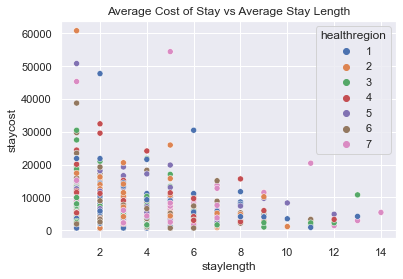

In [15]:
sns.set(style='darkgrid')
sns.set_palette('deep')
sns.scatterplot(data=copd, x='staylength', y='staycost', hue='healthregion', legend='full',
                palette='deep').set_title('Average Cost of Stay vs Average Stay Length')
